# DATA 604 Final Project Prompt

Using SimPy, write a process simulation that includes waiting time (discrete event simulation).  You may use any topic of interest to you.  Write the simulation and all of the following in Jupyter.
Each element is worth 5 points and will be graded using the rubric shown here.
1.  State the problem and its significance.
2.  Provide a flow-chart model. 
3.  Simulate the process for the appropriate number of iterations (justify)
4.  Justify the validity of the model and discuss how you verified it.
5.  State  your conclusions/ findings from the model. 
6.  Generate appropriate graphs (more than one) to illustrate the results and provide a PowerPoint presentation to share with your colleagues.  Post this to the discussion. 

Be sure that your code works!


# Introduction

Supermarket and grocery stores are essential services in our daily lives. Price, location, and waiting time are important factors that influence a consumer's choice in shopping in a grocery store. Longer wait time can increase customers’ dissatisfaction and decrease the chances of them coming back to shop at a store.

The problem in this project is to simulate the waiting times at checkout counters. This is significant as understanding how different parameter affect the waiting time can help store owners/managers to improve their customer's satisfaction and store efficiency.

In [1]:
# import libraries
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt

## Scenario
There are 10 checkouts at a local supermarket store. The first checkout is a fast checkout which serves customers with less than or equal to 10 items. The other 9 checkouts are regular checkouts. The supermarket opening hours are from 7AM to 10PM. By having a fast checkout, it can help minimize customer's waiting time. 

# Flow Chart

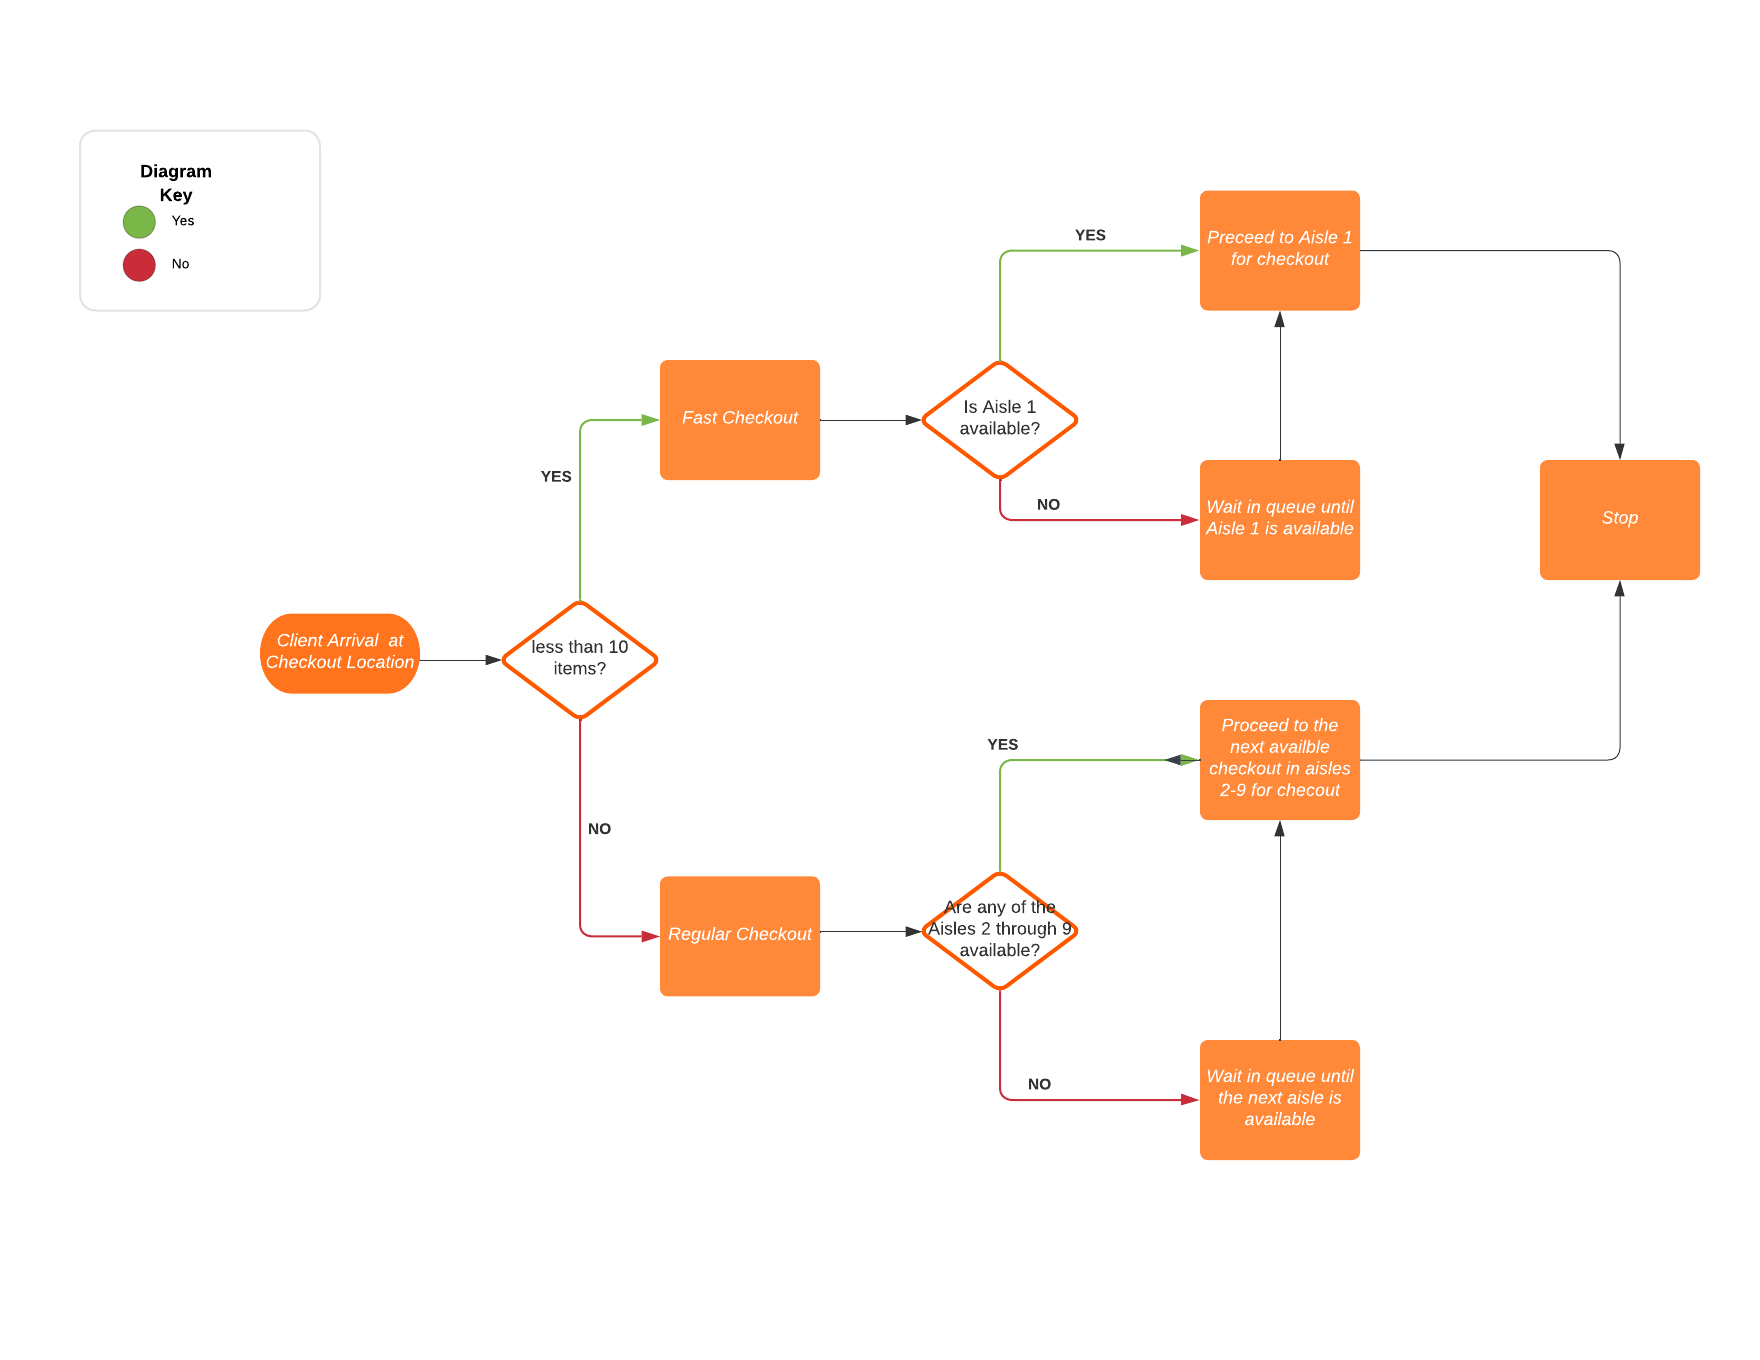

In [2]:
from PIL import Image
myImage = Image.open("/Users/sus/Downloads/Flowchart.png")
myImage

### Constants

In [3]:
CHECKOUTS = 10
FAST_CHECKOUT_MAX_ITEMS = 10
SIMULATION_TIME = 15*60 #Suppose the supermarker hours are from 7AM to 10PM

### Variables

In [4]:
waiting_times = []
number_of_items = []
quenue_length = []
checkout_utilization = [[]for _ in range(CHECKOUTS)]

In [5]:
class Supermarket:
    def __init__(self, env, number_checkouts):
        self.env = env
        self.checkouts = [simpy.Resource(env) for _ in range(number_checkouts)]
        self.available_checkouts = number_checkouts
    def checkout_process(self, customer):
        checkout_time = random.expovariate(1.0 / self.available_checkouts) # generates random expovariate variate
        # as self.available_checkouts increases, the checkout time should be lower
        yield self.env.timeout(checkout_time)   

In [6]:
def create_customer(env, supermarket):
    customer_id = 0
    while True:
        customer_id += 1 # This code chunk helps generate customers
        interarrival_time = random.expovariate(1.0/5) # based on the hypothetical arrival rate are 5 customers per minute 
        yield env.timeout(interarrival_time)
        arrival_times[customer_id] = env.now # store customer's arrival time which will help us calculate the waiting time
        
        env.process(customer(env, customer_id, supermarket))

In [13]:
def customer(env, customer_id, supermarket):
    number_of_items_customer = random.randint(1, 30)
    number_of_items.append(number_of_items_customer)
    
    arrival_time = env.now
    arrival_times[customer_id] = arrival_time
    
    if number_of_items_customer <= FAST_CHECKOUT_MAX_ITEMS:
        print(f"Customer{customer_id-1} goes to the fast checkout.")
        aisle = supermarket.checkouts[0] # if the customer has less than or equal to 10 items, he/she should checkout in the fast checkout in aisle 1
        print(f"Customer{customer_id}: Arrival time {arrival_time},Number of items {number_of_items[customer_id]}. ")
    else:
        aisle = random.choice(supermarket.checkouts[1:])
        print(f"Customer{customer_id}: Arrival time {arrival_time},Number of items {number_of_items[customer_id]}. ")
    with aisle.request() as request:
        yield request # customer should wait for available checkout before preceeding to the checkout
        
        waiting_time = env.now - arrival_times[customer_id]
        waiting_times.append(waiting_time)
        
        yield env.process(supermarket.checkout_process(customer_id))
        checkout_utilization[supermarket.checkouts.index(aisle)].append(env.now)
        wait_time = env.now - arrival_times[customer_id]
        print(f"Customer{customer_id}: Checking out time {env.now}, Wait time {wait_time} ")
        

In [14]:
random.seed(2023)
env = simpy.Environment()
supermarket = Supermarket(env, CHECKOUTS)
arrival_times = {}
env.process(create_customer(env, supermarket))
env.run(until = SIMULATION_TIME)

Customer1: Arrival time 2.413798612447401,Number of items 11. 
Customer1: Checking out time 6.274551308021155, Wait time 3.860752695573754 
Customer2: Arrival time 20.266985852034146,Number of items 27. 
Customer3: Arrival time 24.49877761624535,Number of items 8. 
Customer3 goes to the fast checkout.
Customer4: Arrival time 29.762636050718612,Number of items 21. 
Customer5: Arrival time 31.554290042306413,Number of items 5. 
Customer5: Checking out time 33.923192093256304, Wait time 2.3689020509498917 
Customer2: Checking out time 35.614392119150104, Wait time 15.347406267115957 
Customer3: Checking out time 37.17019397597328, Wait time 12.671416359727928 
Customer5 goes to the fast checkout.
Customer6: Arrival time 44.677659476532114,Number of items 26. 
Customer7: Arrival time 45.04158572561354,Number of items 29. 
Customer7: Checking out time 47.27072314350264, Wait time 2.229137417889106 
Customer8: Arrival time 51.14576324175478,Number of items 15. 
Customer4: Checking out time 5

# Verification and Validation

To verify any model, we should check each step of our code. I made sure to print out the number of items, arrival time, and wait time for each customer. In the early stage of this project, my code generated every customers to arrive at the same time at 0 minutes, which is not realistic in real world. Customers arrive at any store at different times of the day. Modifying the code, I was able to generate customers arriving at different times. The wait time must not exceed a certain unrealistic minutes (ie. 240 minutes). The randomly assigned number of items is from 1 and 30.

To validate any model, we should check each step of our code and compare to real-world historical data. to a However, there are no real published supermarket data. I could only verify the model based on my personal experiences and research on articles online. According to The Homa Files, "in 20 out of 25 major U.S. cities, the average wait time at grocery stores was under five minutes." Our calculated average wait time, 3.56 minutes, is within the range. We can also look at the graphs for the distribution of the data below.  

In [15]:
average_waiting_time = np.mean(waiting_times)
print("average wait time:", average_waiting_time)

average wait time: 3.5579579361068716


# Distribution of Wait Time

The histogram below shows a exponential distribution with the highest frequency of wait time between 0 - 3 minutes. This article (https://arxiv.org/pdf/1905.12155.pdf) also helps in understanding the distribution of wait time in supermarkets.

Text(0.5, 1.0, 'Distribution of Wait Time')

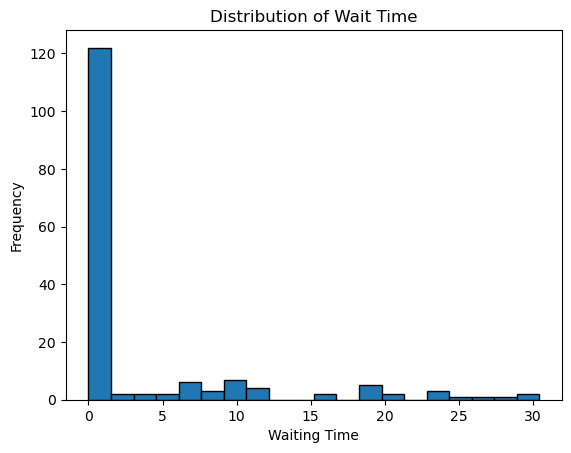

In [10]:
# Distribution of Wait Time
plt.hist(waiting_times, bins=20, edgecolor='black')
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.title('Distribution of Wait Time')

# Distribution of Number of Items
The histogram below shows the distribution of number of items purchased by the customers. The number of items were randomly generated. 

Text(0, 0.5, 'Frequency')

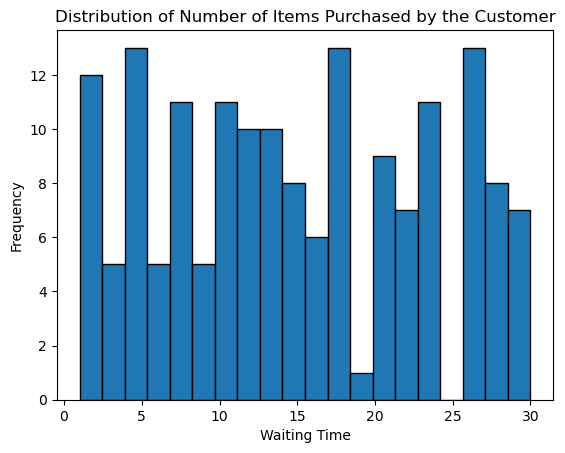

In [11]:
plt.hist(number_of_items, bins=20, edgecolor='black')
plt.title('Distribution of Number of Items Purchased by the Customer')
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')

# Checkout Utilization Over Time

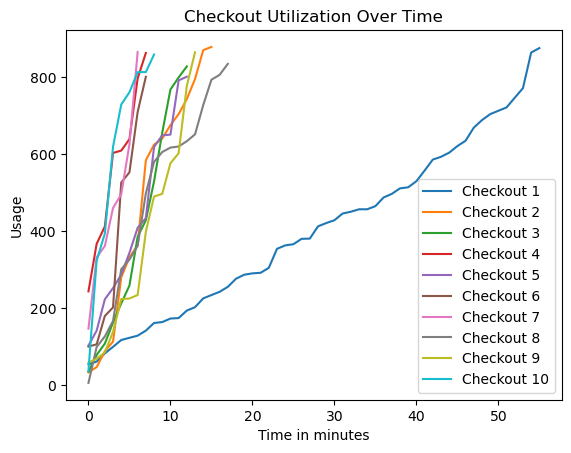

In [12]:
checkout_labels = [f'Checkout {i+1}' for i in range(CHECKOUTS)]
for i in range(CHECKOUTS):
    plt.plot(checkout_utilization[i], label = checkout_labels[i])
plt.title('Checkout Utilization Over Time')
plt.xlabel('Time in minutes')
plt.ylabel('Usage')
plt.legend()


# Conclusion and Further Enhancement:

From the simulation, we can draw conclusion regarding the waiting time at a supermarket. By including a fast checkout, it can lower the wait time. Changing the parameters, we can see how each variable affect the waiting time. For example, if you lower the capacity of checkouts, you may find longer wait time for the same amount of customers. The average waiting time for this simulation was about 3.56 minutes. However, the simulation can vary if you do not set a random seed. 

Below are some ideas to further enhance the simulation:
1. Modify the waiting time for the different checkouts. For example for fast checkout, waiting_time = random.uniform(0, 3). For regular checkout, waiting_time = random.uniform(0, 10). The waiting time should be longer for regular checkout. 
2. Calculate a more realistic wait time by including the scanning time per items. Total wait time = (queue time for next available checkout) + (number of items)*(time to scan per item). I did attempt to implement this. However, due to lack of time, I could not make the code work correctly. To understand the what may factor into scanning time, please see the Linkedin Source in Resources.
3. Introduce another parameters such as staff availability. If the store is short on staff, there could be longer wait time. 
4. Allow customers to switch to another aisle if the queue is shorter. 

# Resources

## Supermarket 
1. https://www.supermarketnews.com/retail-financial/customers-waiting-hardest-part
2. https://retailwire.com/discussion/checkout-time-limit-around-four-minutes/#:~:text=The%20online%20survey%20of%2013%2C000,about%20four%20minutes%20or%20less
3. https://www.delish.com/food/news/a41500/grocery-store-wait-times/
4. https://www.linkedin.com/pulse/can-we-reduce-those-long-queues-front-grocery-stores-50-henegedara
5. https://www.scirp.org/pdf/20-1.67.pdf
6. https://homafiles.info/2009/08/20/how-long-do-you-wait-in-line-to-checkout-at-the-supermarket/
## SimPy
1. https://realpython.com/simpy-simulating-with-python/
2. https://pythonhosted.org/SimPy/Tutorials/TheBank.html